# Exercise - Mini Data Analysis Project

Let's do a complete pandas exercise for a mini data analysis challenge.

This exercise will help to put in use the knowledge of pandas and even other modules.

### What do we have?

We have 2019 data from a service company.

- EmployeeRegistry  
- ClientRegistry  
- ProvidedServicesBase  

**Note 1**: To read CSV files, use `read_csv`  
**Note 2**: To read XLSX files (standard Excel files, not CSV), use `read_excel`

### What do we want to know/do?

1. **Total Payroll Value** -> What was the company's total expenditure on employee salaries?  
    **Suggestion**: Calculate the total salary of each employee: salary + benefits + taxes, then sum up all salaries.

2. **What was the company's revenue?**  
    **Suggestion**: Calculate the total revenue for each service, then sum up the revenue from all services.

3. **What percentage of employees have closed a contract?**  
    **Suggestion**: In the services database, we have the employee who closed each service. However, not all employees in the company have closed a service.  
    - In the employee registry, we have a list of all employees.  
    - We want to calculate `Number_of_Employees_Closed_Services / Total_Number_of_Employees`.  
    - To calculate the number of employees who closed a service, use the services database and count how many employees are listed there. But remember, each employee should only be counted once.  
    **Tip**: If you apply the `.unique()` method to a variable that is just one column of a DataFrame, it will remove all duplicate values from that column.  
    Example: `unique_colA = dataframe['columnA'].unique()` returns a list with all items in columnA appearing only once. All repeated values in columnA are excluded from the `unique_colA` variable.

4. **Calculate the total number of contracts each company department has closed.**

5. **Calculate the total number of employees per department.**

6. **What is the average monthly ticket value (average monthly revenue) of the contracts?**  
    **Tip**: `.mean()` calculates the average -> Example: `average_colA = dataframe['columnA'].mean()`

**Note**: Common encoding options:  
`encoding='latin1'`, `encoding='ISO-8859-1'`, `encoding='utf-8'`, or `encoding='cp1252'`.

**Important Observation**: If your code throws an error while importing the files:  
- ClientRegistry.csv  
- EmployeeRegistry.csv  

Use `;` (semicolon) as a separator to resolve this issue.

1. **Total Payroll Value**

In [1]:
import pandas as pd

employee_df = pd.read_csv('EmployeeRegistry.csv', sep=';', decimal=',')
client_df = pd.read_csv('ClientRegistry.csv', sep=';', decimal=',')
services_df = pd.read_excel('ProvidedServicesBase.xlsx')

employee_df = employee_df.drop(['Marital Status', 'Position'], axis=1)

employee_df['Total Salary'] = employee_df['Base Salary'] + employee_df['Taxes'] + employee_df['Benefits'] + employee_df['TA'] + employee_df['MA']
print('Total Payroll Value is ${:,}'.format(sum(employee_df['Total Salary'])))

Total Payroll Value is $2,717,493.22


2. **What was the company's revenue?**  

In [2]:
revenue_df = services_df[['Client ID', 'Total Contract Time (Months)']].merge(client_df[['Client ID', 'Montly Contract Price']])

print('The revenue was ${:,}'.format(sum(revenue_df['Total Contract Time (Months)'] * revenue_df['Montly Contract Price'])))

The revenue was $5,519,160


3. **What percentage of employees have closed a contract?** 

In [3]:
qtt_contracts = len(services_df['Employee ID'].unique())
qtt_total_employee = len(employee_df['Employee ID'])
print('Percentage was {:.2%}'.format(qtt_contracts / qtt_total_employee))

Percentage was 86.84%


4. **Calculate the total number of contracts each company department has closed.**

Area
Administrative    63
Operations        48
Sales             44
Finance           42
Logistics         40
Name: count, dtype: int64


<Axes: xlabel='Area'>

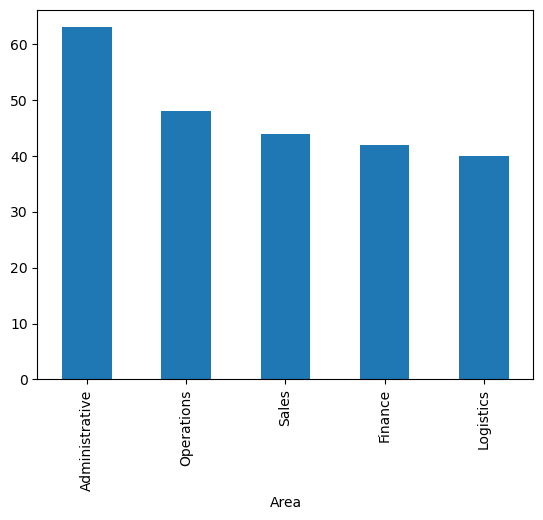

In [4]:
area_contracts_df = services_df[['Employee ID']].merge(employee_df[['Employee ID', 'Area']])
qtt_contracts_area = area_contracts_df['Area'].value_counts()
print(qtt_contracts_area)
qtt_contracts_area.plot(kind='bar')

5. **Calculate the total number of employees per department.**

Area
Administrative    26
Sales             26
Operations        23
Logistics         21
Finance           18
Name: count, dtype: int64


<Axes: xlabel='Area'>

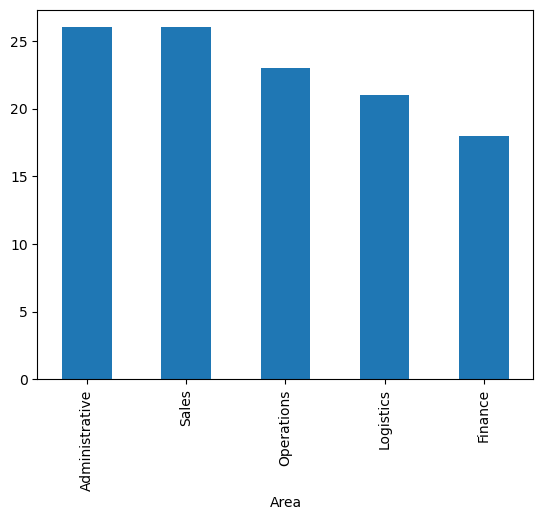

In [5]:
qtt_employee_area = employee_df['Area'].value_counts()
print(qtt_employee_area)
qtt_employee_area.plot(kind='bar')

6. **What is the average monthly ticket value (average monthly revenue) of the contracts?**  

In [6]:
avg_ticket = client_df['Montly Contract Price'].mean()
print('Averange montly ticket is ${:,.2f}'.format(avg_ticket)) 

Averange montly ticket is $2,502.56
